In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D 

In [2]:
TRAIN_DIR = '../archive/train/'
TEST_DIR = '../archive/test/'


In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)  # Construct full label directory path
        if os.path.isdir(label_path):  # Ensure it’s a directory
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "Completed")
    return image_paths, labels

In [4]:
#Convert to dataframe

train = pd.DataFrame()
train['image'],train['label']=load_dataset(TRAIN_DIR)
#shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,../archive/train/sad/Training_45532911.jpg,sad
1,../archive/train/sad/Training_29912553.jpg,sad
2,../archive/train/fear/Training_12042390.jpg,fear
3,../archive/train/angry/Training_23274253.jpg,angry
4,../archive/train/sad/Training_16559892.jpg,sad


In [6]:
test = pd.DataFrame()
test['image'],test['label']=load_dataset(TEST_DIR)
#shuffle the dataset

test.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,../archive/test/happy/PrivateTest_45699463.jpg,happy
1,../archive/test/happy/PrivateTest_61855708.jpg,happy
2,../archive/test/happy/PublicTest_53681781.jpg,happy
3,../archive/test/happy/PrivateTest_52109800.jpg,happy
4,../archive/test/happy/PublicTest_41104919.jpg,happy


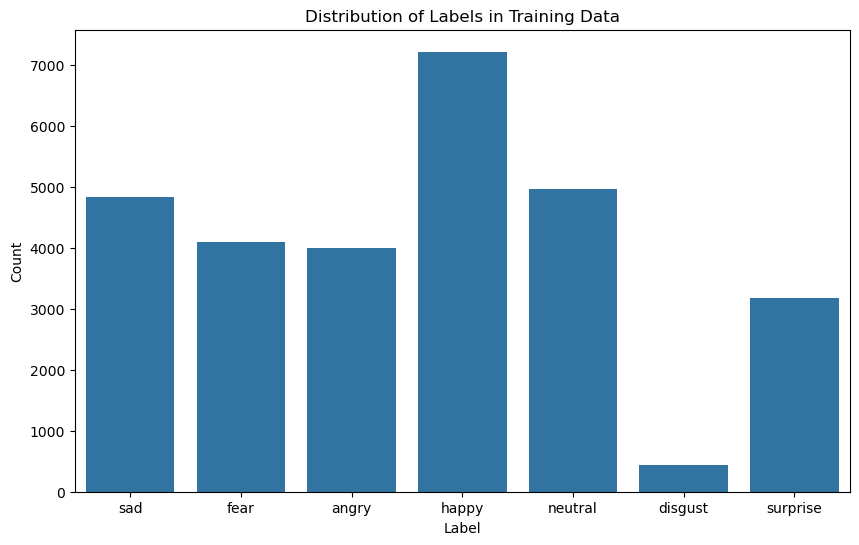

In [7]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
sns.countplot(x='label', data=train)
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

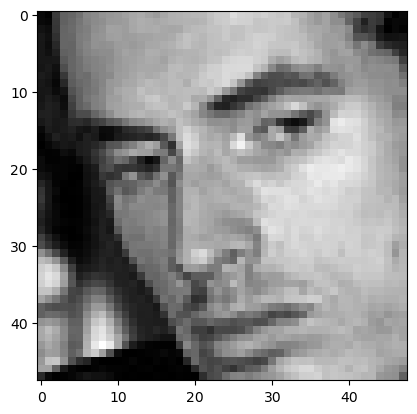

In [8]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

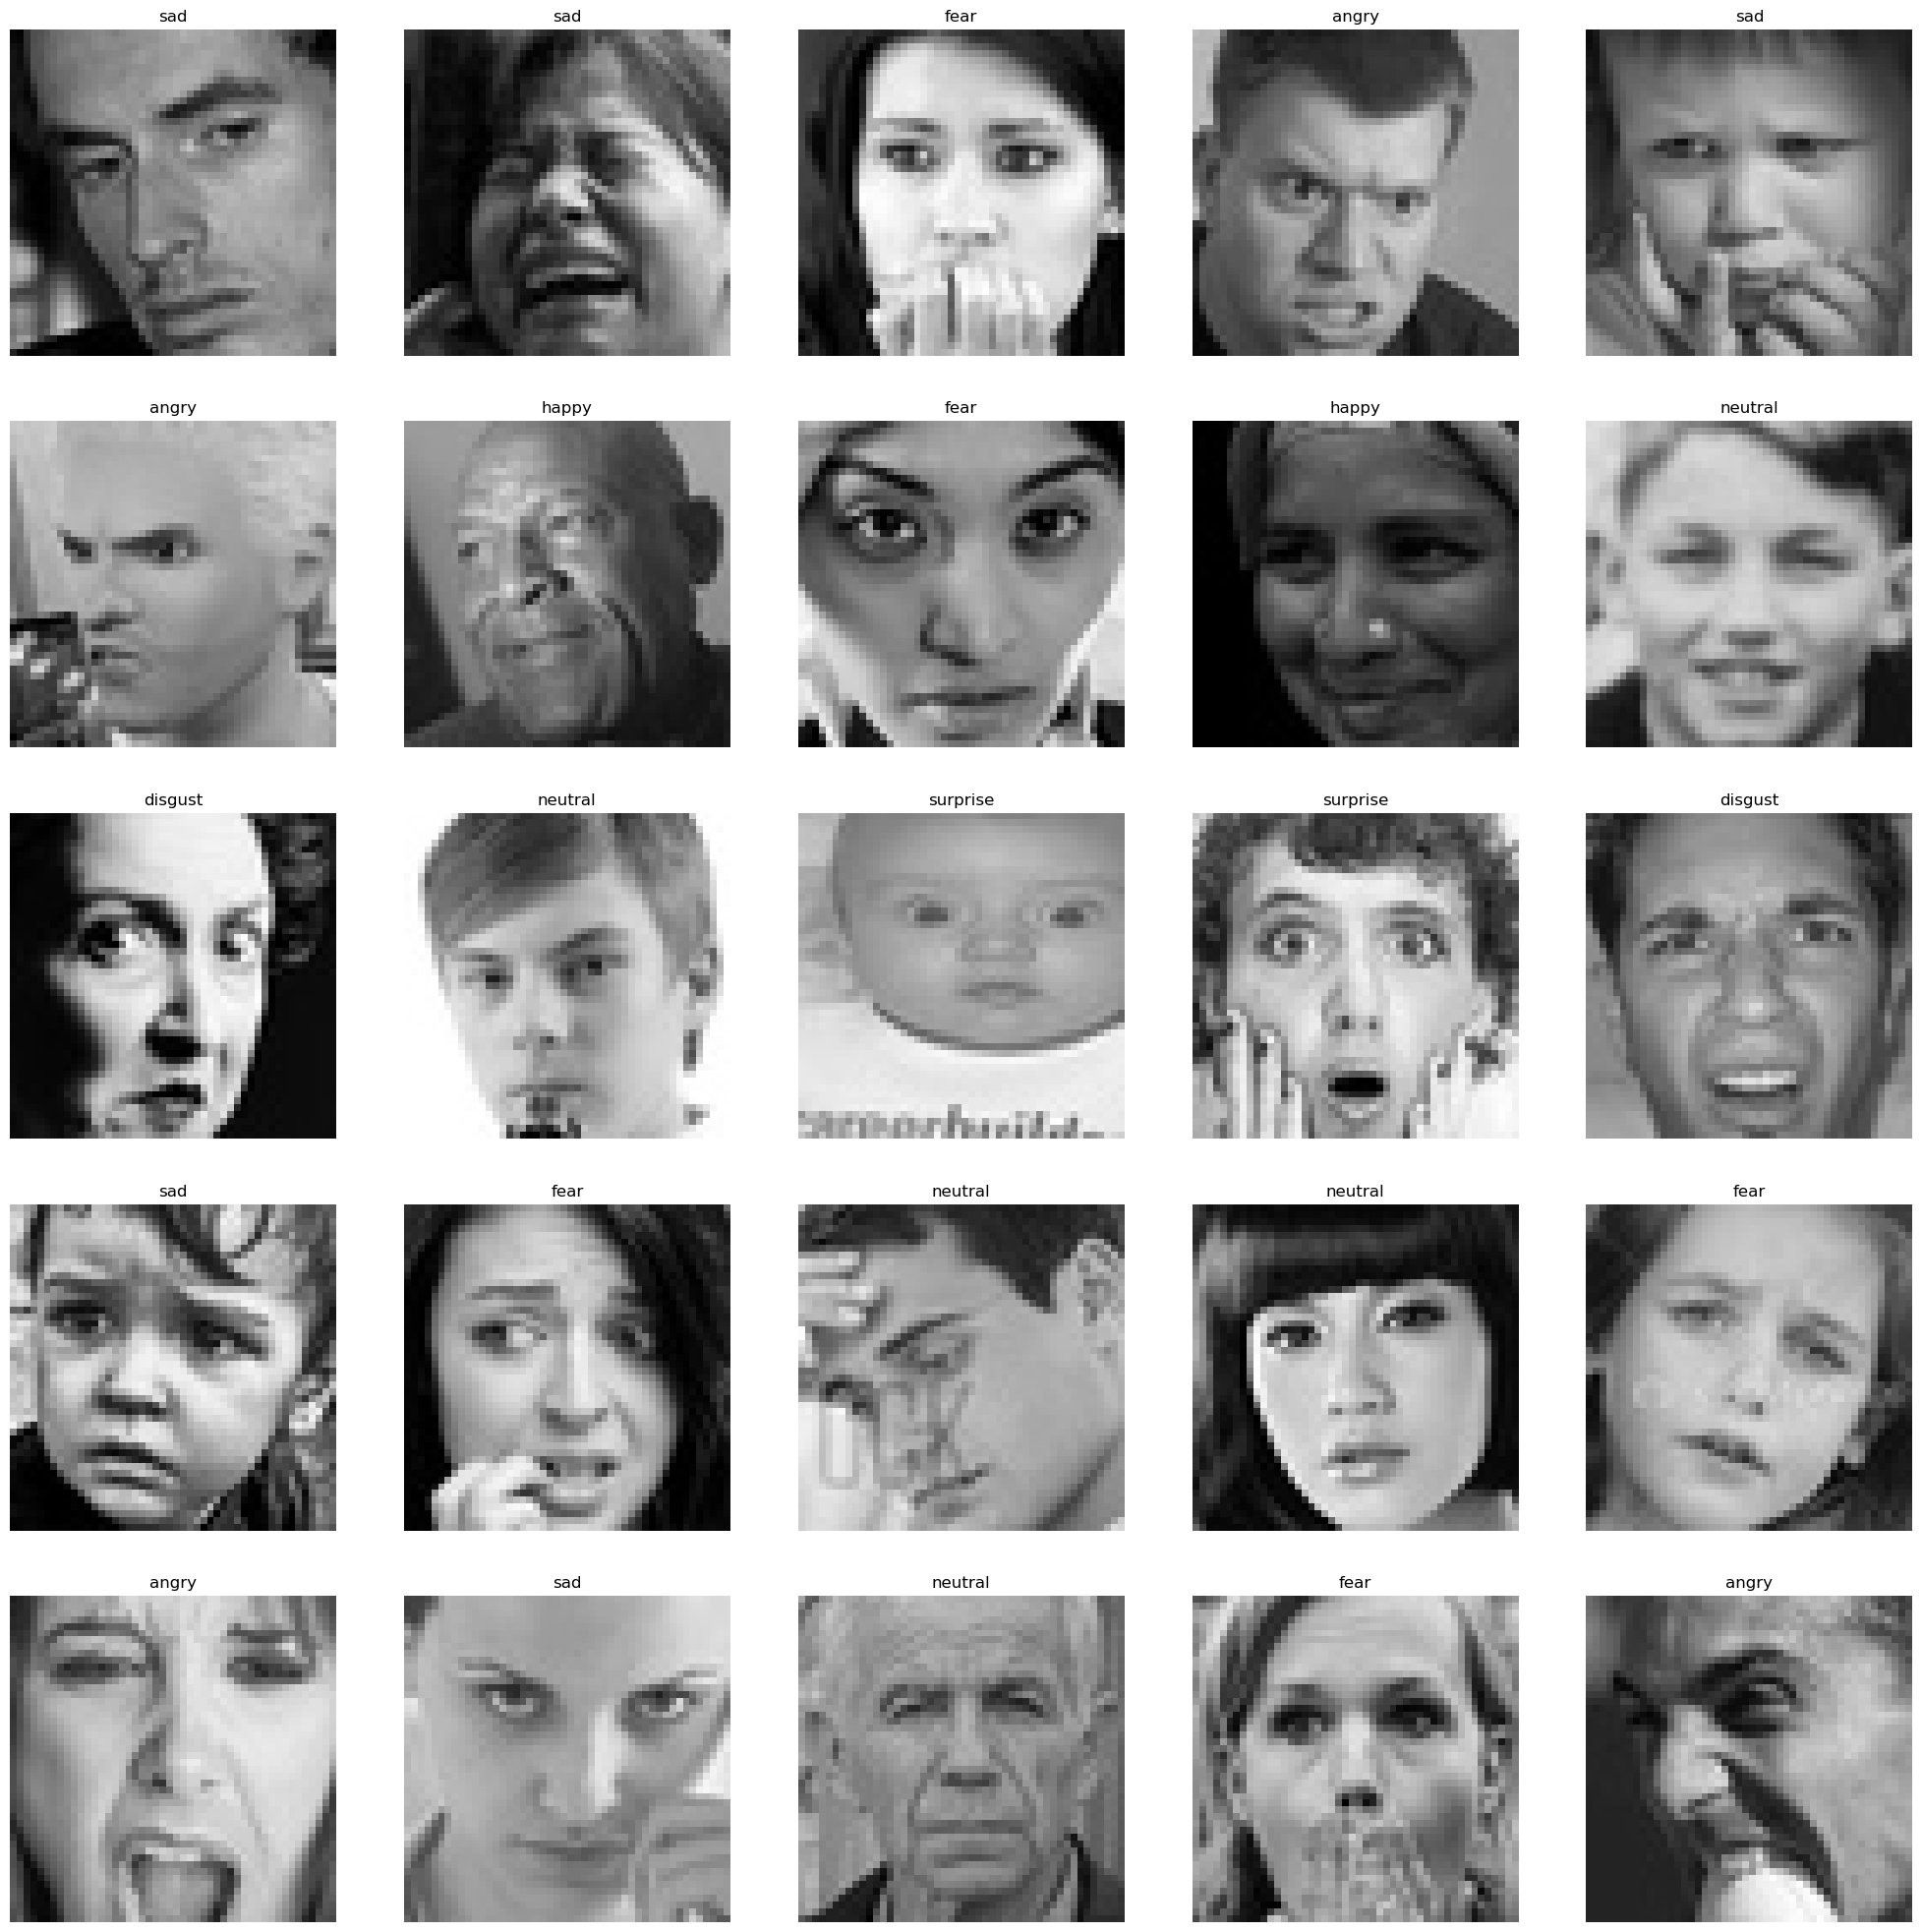

In [9]:
plt.figure(figsize=(25,25))
files=train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [10]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img=np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features),48,48,1)

    return features

In [14]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [15]:
X_train = train_features/255.0
X_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [18]:
input_shape=(48,48,1)
output_class = len(set(train['label']))  # Update based on your dataset

In [19]:
model= Sequential()

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#Connected layers

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

#output layer

# Output layer for 7 classes
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
history = model.fit(x=X_train, y =y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 376s 417ms/step - accuracy: 0.2409 - loss: 1.8309 - val_accuracy: 0.2471 - val_loss: 1.8030
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 389s 433ms/step - accuracy: 0.2523 - loss: 1.8029 - val_accuracy: 0.2979 - val_loss: 1.7087
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 364s 405ms/step - accuracy: 0.2991 - loss: 1.7224 - val_accuracy: 0.3413 - val_loss: 1.6182
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 375s 417ms/step - accuracy: 0.3473 - loss: 1.6384 - val_accuracy: 0.3957 - val_loss: 1.5046
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 368s 410ms/step - accuracy: 0.3808 - loss: 1.5731 - val_accuracy: 0.4196 - val_loss: 1.4812
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 359s 400ms/step - accuracy: 0.3967 - loss: 1.5398 - val_accuracy: 0.4461 - val_loss: 1.4079
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 366s 407ms/step - accuracy: 0.4139 - loss: 1.5041 - val_accuracy: 0.4554 - val_loss: 1.3874
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 368s 410ms/step - accuracy: 0.4263 -

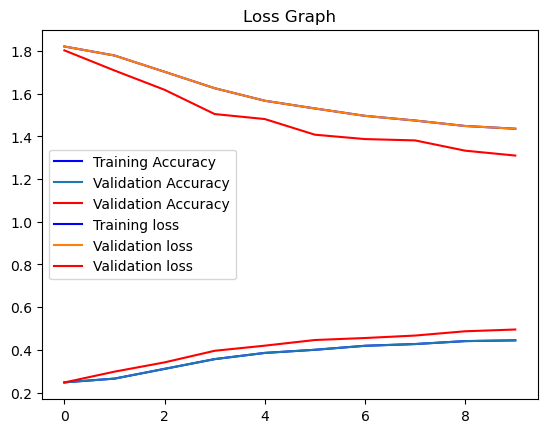

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs= range(len(acc))
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,acc,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
#plt.figure()


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs= range(len(loss))
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,loss,val_loss,'r',label='Validation loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output:  happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Output:  happy


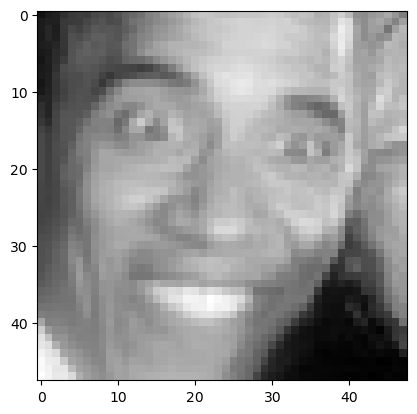

In [28]:
import random


# Select a random image index
image_index = random.randint(0, len(test) - 1)

# Display the original label
print("Original Output: ", test['label'][image_index])

# Get the model's prediction for the image
pred = model.predict(X_test[image_index].reshape(1, 48, 48, 1))

# Convert the predicted label index to the original label
predicted_label = le.inverse_transform([pred.argmax()])[0]  # Wrap pred.argmax() in a list

# Display the predicted label
print("Predicted Output: ", predicted_label)

# Show the image
plt.imshow(X_test[image_index].reshape(48, 48), cmap='gray')
plt.show()
